In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Loop through all the cities in the list.
set_count = 1
record_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = "https://api.openweathermap.org/data/2.5/weather?&q=" + city.replace(" ","+") + "&units=Imperial&APPID="+weather_api_key

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | codrington
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | mahebourg
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | kendari
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | adrar
Processing Record 9 of Set 1 | guerrero negro
Processing Record 10 of Set 1 | kahului
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | olafsvik
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | wajima
Processing Record 16 of Set 1 | abeche
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | ghanzi
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | montego bay
Processing Record 21 of Set 1 | bambous virieux
Processing Record 22 of Set 1 | nizhneyansk
City not found. Skipping...
Proces

Processing Record 38 of Set 4 | xiaolingwei
Processing Record 39 of Set 4 | ponta do sol
Processing Record 40 of Set 4 | novopokrovka
Processing Record 41 of Set 4 | atasu
Processing Record 42 of Set 4 | goalpara
Processing Record 43 of Set 4 | tromso
Processing Record 44 of Set 4 | christchurch
Processing Record 45 of Set 4 | whitehorse
Processing Record 46 of Set 4 | fara in sabina
Processing Record 47 of Set 4 | broken hill
Processing Record 48 of Set 4 | los llanos de aridane
Processing Record 49 of Set 4 | ust-kuyga
Processing Record 50 of Set 4 | tucson
Processing Record 1 of Set 5 | bantou
Processing Record 2 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 3 of Set 5 | bambamarca
Processing Record 4 of Set 5 | malia
Processing Record 5 of Set 5 | xichang
Processing Record 6 of Set 5 | avarua
Processing Record 7 of Set 5 | yatou
Processing Record 8 of Set 5 | viedma
Processing Record 9 of Set 5 | okha
Processing Record 10 of Set 5 | camacha
Processing Record 11 

City not found. Skipping...
Processing Record 28 of Set 8 | skjervoy
Processing Record 29 of Set 8 | san patricio
Processing Record 30 of Set 8 | palmer
Processing Record 31 of Set 8 | huarmey
Processing Record 32 of Set 8 | wewak
Processing Record 33 of Set 8 | alice springs
Processing Record 34 of Set 8 | san vicente
Processing Record 35 of Set 8 | golden
Processing Record 36 of Set 8 | celestun
Processing Record 37 of Set 8 | synya
Processing Record 38 of Set 8 | hambantota
Processing Record 39 of Set 8 | brandfort
Processing Record 40 of Set 8 | gornopravdinsk
Processing Record 41 of Set 8 | ancud
Processing Record 42 of Set 8 | simbahan
Processing Record 43 of Set 8 | ogre
Processing Record 44 of Set 8 | olga
Processing Record 45 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 46 of Set 8 | chuy
Processing Record 47 of Set 8 | agadir
Processing Record 48 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 49 of Set 8 | petropavlovsk-kamchatskiy
Pro

City not found. Skipping...
Processing Record 15 of Set 12 | talcher
Processing Record 16 of Set 12 | yeppoon
Processing Record 17 of Set 12 | tazovskiy
Processing Record 18 of Set 12 | sedhiou
Processing Record 19 of Set 12 | rongcheng
Processing Record 20 of Set 12 | kichera
Processing Record 21 of Set 12 | luderitz
Processing Record 22 of Set 12 | sur
Processing Record 23 of Set 12 | zhengjiatun
Processing Record 24 of Set 12 | vila
Processing Record 25 of Set 12 | walvis bay
Processing Record 26 of Set 12 | nampa
Processing Record 27 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 28 of Set 12 | saint-augustin
Processing Record 29 of Set 12 | arauco
Processing Record 30 of Set 12 | steamboat springs
Processing Record 31 of Set 12 | chulman
Processing Record 32 of Set 12 | plouzane
Processing Record 33 of Set 12 | bandar-e lengeh
Processing Record 34 of Set 12 | borovoy
Processing Record 35 of Set 12 | west bay
Processing Record 36 of Set 12 | kuybyshevo
Processi

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Codrington,-38.27,141.97,50.07,73,98,16.80,AU,2020-08-23 02:11:10
1,Bredasdorp,-34.53,20.04,48.20,87,34,5.82,ZA,2020-08-23 02:07:53
2,Mahebourg,-20.41,57.70,69.80,77,75,9.17,MU,2020-08-23 02:08:28
3,Mataura,-46.19,168.86,54.00,80,95,5.01,NZ,2020-08-23 02:07:54
4,Kendari,-3.94,122.50,82.67,60,36,4.43,ID,2020-08-23 02:11:12
5,Hobart,-42.88,147.33,50.00,93,75,9.17,AU,2020-08-23 02:05:29
6,Vaini,-21.20,-175.20,80.60,83,40,11.41,TO,2020-08-23 02:07:44
7,Adrar,20.50,-10.07,96.71,11,40,4.09,MR,2020-08-23 02:11:13
8,Guerrero Negro,27.98,-114.06,76.96,70,1,16.13,MX,2020-08-23 02:11:14
9,Kahului,20.89,-156.47,89.60,55,40,24.16,US,2020-08-23 02:09:25


In [7]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

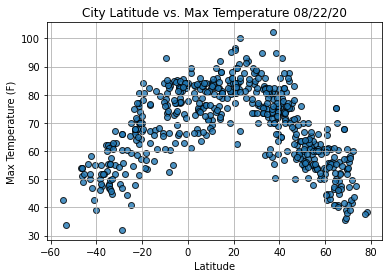

In [9]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

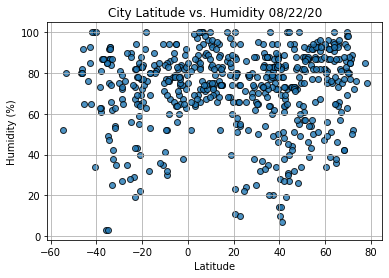

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

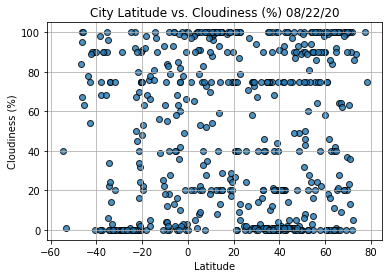

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

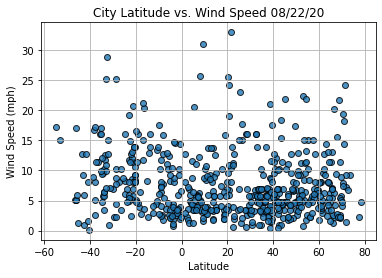

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [13]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [14]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    plt.title(title)
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

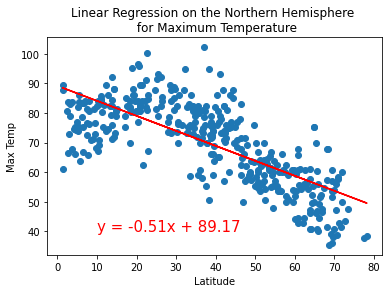

In [15]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,y_values,"Linear Regression on the Northern Hemisphere \n for Maximum Temperature","Max Temp",(10,40))

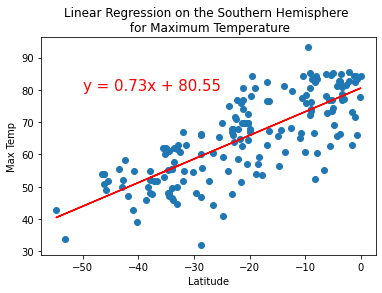

In [16]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

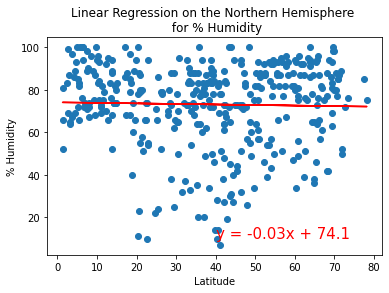

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

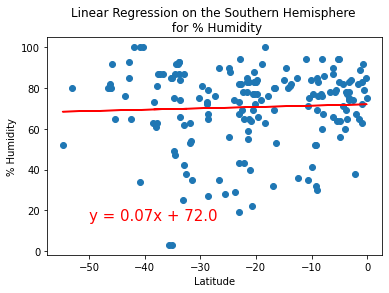

In [18]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

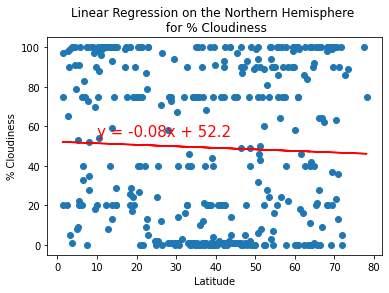

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

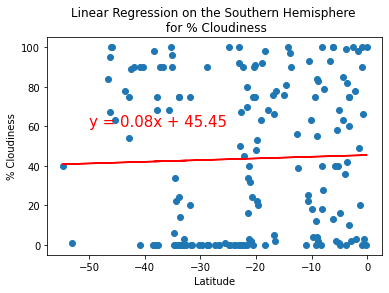

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

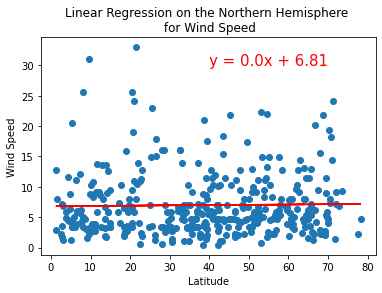

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

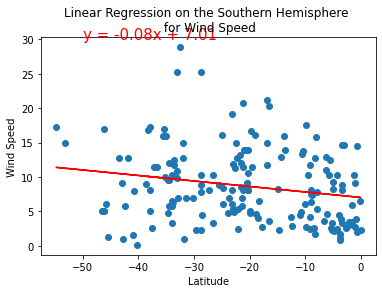

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,30))